# Xarray
#### by : Alpon Sepriando
#### email : alpon.sepriando@bmkg.go.id

*Xarray is a powerful Python library designed to work with labeled multidimensional arrays, particularly useful for handling and analyzing large datasets commonly found in scientific disciplines such as meteorology, climate science, and geoscience*

In [114]:
## instalation
# pip install import netCDF4 h5netcdf xarray

In [115]:
## import module
import xarray as xr

### NetCDF Format¶

- NetCDF (Network Common Data Form) has been defined by the Unidata program and it is widely used to store data and metadata for MetOc and Remote Sensing datasets.
- NetCDF file may be considered as a multidimensional array, made of different variables and potentially different dimensions for each variables.

![alt text](image-1.png)

In [116]:
dataset = xr.open_dataset('Satellite_GK2A_Fiji/gk2a_ami_le1b_ir087_fji020me_202312070830.nc')
dataset

<xarray.Dataset>
Dimensions:             (lats: 2500, lons: 3000)
Coordinates:
  * lats                (lats) float64 5.0 4.98 4.96 ... -44.96 -44.98 -45.0
  * lons                (lons) float64 150.0 150.0 150.1 ... 239.9 240.0 240.0
Data variables:
    image_pixel_values  (lats, lons) uint16 ...
Attributes: (12/49)
    instrument_name:                  AMI
    data_processing_center:           NMSC
    data_processing_mode:             operation
    channel_spatial_resolution:       2.0
    channel_center_wavelength:        8.7
    scene_acquisition_time:           20231207_083032
    ...                               ...
    number_of_columns:                3000
    number_of_lines:                  2500
    origianl_sourece_file:            gk2a_ami_le1b_ir087_fd020ge_20231207083...
    grid_mapping_name:                metcator
    epsg_code:                        EPSG:4326
    Conventions:                      CF-1.11

![alt text](image-2.png)

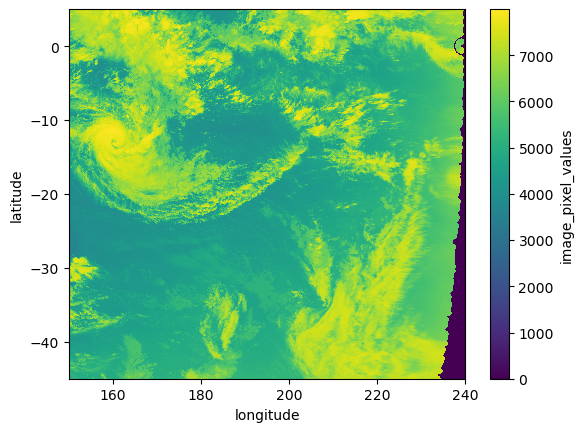

In [117]:
import matplotlib.pyplot as plt

#get values from parameter
value = dataset['image_pixel_values']

# Basic plot
value.plot()

plt.show()

<xarray.DataArray 'image_pixel_values' (lats: 1000, lons: 1999)>
[1999000 values with dtype=uint16]
Coordinates:
  * lats     (lats) float64 -10.01 -10.03 -10.05 -10.07 ... -29.95 -29.97 -29.99
  * lons     (lons) float64 160.0 160.1 160.1 160.1 ... 219.9 219.9 220.0 220.0
Attributes:
    width:                                       3000
    height:                                      2500
    channel_name:                                IR087
    detector_side:                               2
    number_of_total_bits_per_pixel:              16
    number_of_data_quality_flag_bits_per_pixel:  2
    number_of_valid_bits_per_pixel:              13
    data_quality_flag_meaning:                   0:good_pixel, 1:conditionall...
    ground_sample_distance_ew:                   5.6e-05
    ground_sample_distance_ns:                   5.6e-05


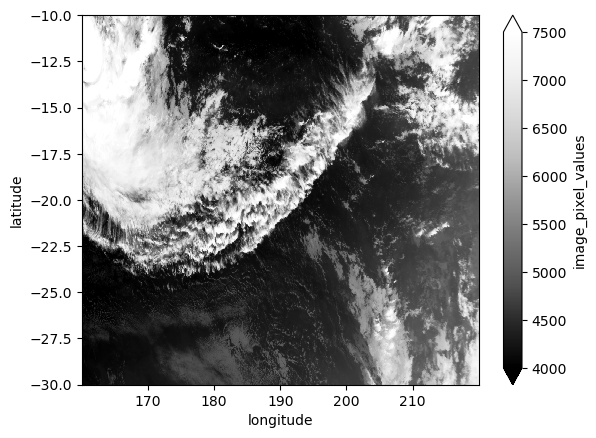

In [118]:
## Simple modification 

import matplotlib.pyplot as plt
value = dataset['image_pixel_values']

##Slicing data
subset = value.sel(lats=slice(-10, -30), lons=slice(160, 220))
print(subset)

# Basic plot
subset.plot(cmap='Greys_r', vmin=4000, vmax=7500)
plt.show()

In [119]:
## Convert DN to BT
# Load the Excel file and get the DN and BT columns
file_path = '/Users/sic/Desktop/visualization_training/Satellite_GK2A_Fiji/20190415_gk-2a ami conversion table_v3.0.xlsx'
conversion_table = pd.read_excel(file_path, sheet_name='Calibration Table_WN', header=None, skiprows=[0, 1])
DN = conversion_table[0].values
BT = conversion_table[27].values

# Create a dictionary for mapping DN to BT
dn_to_bt_mapping = dict(zip(DN, BT))

# Vectorized replacement of DN values with BT values in the image data
vectorized_replacement = np.vectorize(dn_to_bt_mapping.get)
value_converted = vectorized_replacement(value)

# Update the xarray DataArray with the converted values
dataset['image_pixel_values'].values = value_converted

# Save the modified dataset to a new netCDF file if needed
output_nc_file_path = 'Satellite_GK2A_Fiji/gk2a_ami_le1b_ir087_fji020me_202312070830_converted.nc'
dataset.to_netcdf(output_nc_file_path)

/Users/sic/miniconda3/envs/present_weather/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: SerializationWarning: saving variable image_pixel_values with floating point data as an integer dtype without any _FillValue to use for NaNs
  exec(code_obj, self.user_global_ns, self.user_ns)


## Excercise : 
### 1. open file gk2a_ami_le1b_ir087_fji020me_202312070830_converted.nc
### 2. check desciption
### 3. Plot the data
### 4. Modified 
### 5. Save as image png

Plot dengan penambahan judul, label sumbu, dan colorbar
#plt.figure(figsize=(8, 6))
#plt.imshow(values, cmap='Greys', vmin=180, vmax=330)
#plt.colorbar(label='Brightness Temperature (°C)')
#plt.title('GK2A Satellite Image - IR087 Channel')
#plt.grid(False)
#plt.show()